<a href="https://colab.research.google.com/github/avishek-astra/Deep_Learning_Experiments/blob/main/overfitting_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
#importing libraries
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')
#NEW!
from sklearn.model_selection import train_test_split
#new!
from torch.utils.data import DataLoader, TensorDataset

<ipython-input-27-f1c88ffbfa1a>:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


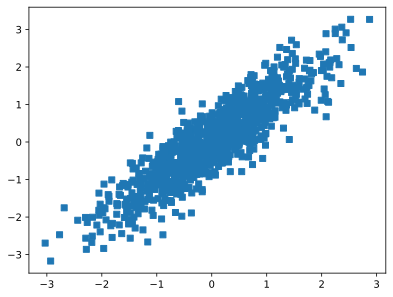

In [38]:
# data creation
N=1000
orgX=torch.randn(N,1)
orgY=orgX+torch.randn(N,1)/2
#ploting
plt.plot(orgX,orgY,'s')
plt.show()


In [29]:
#building a nn model
ANNreg=nn.Sequential(
    nn.Linear(1,1), #input layer
    nn.ReLU(), #activation function
    nn.Linear(1,1) #output layer
)
ANNreg

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [30]:
#Learning rate
LearningRate=0.05
#loss function
lossfun=nn.MSELoss()
#optimizer (the flavour of gradient descent to implement)
optimizer=torch.optim.SGD(ANNreg.parameters(),lr=LearningRate)


In [31]:
prop=.8
#Select data for training
train_data,test_data,train_labels,test_labels=train_test_split(orgX,orgY,train_size=.8)
#create Dataloaders for training and testing
#create datasets
train_dataset=TensorDataset(train_data,train_labels)
test_dataset=TensorDataset(test_data,test_labels)
#now create the dataloader
train_loader=DataLoader(train_dataset,batch_size=10,shuffle=True)
test_loader=DataLoader(test_dataset,batch_size=len(test_dataset),shuffle=True)
#show the sizes

TRAIN THE MODEL

In [39]:
numepochs=500

for epochi in range(numepochs):
  for x,Y in train_loader:
    #forward pass
    yHat=ANNreg(x)
    #compute loss
    loss=lossfun(yHat,Y)
    #BACKPROP
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()



In [33]:
#report the losses
#compute losses of the TEST set
predYtest=ANNreg(test_data)
testloss=lossfun(predYtest,test_labels)
print(loss)
#PRINT OUT fINAL TRAIN loss and test loss
print(f'Final train loss: {loss.detach():.2f}')
print(f'Final test loss: {testloss.detach():.2f}')


tensor(0.1118, grad_fn=<MseLossBackward0>)
Final train loss: 0.11
Final test loss: 0.23


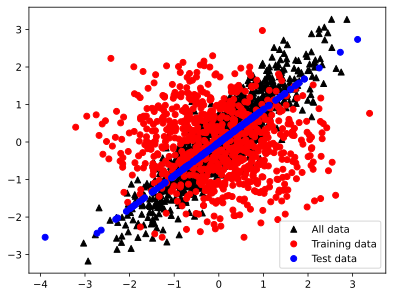

In [43]:
#plot ht data
predYtrain=[]
#predictions for final training run
for x,Y in train_loader:
  current_pred=ANNreg(x).detach().numpy()
  predYtrain.extend(current_pred)
predYtrain=np.array(predYtrain)
predYtest=ANNreg(test_data).detach().numpy()
#now plot
plt.plot(orgX.numpy(),orgY.numpy(),'k^',label='All data')
plt.plot(train_data.detach().numpy(),predYtrain,'ro',label='Training data')
plt.plot(test_data.detach().numpy(),predYtest,'bo',label='Test data')
plt.legend()
plt.show()



In [ ]:
# 1) The train/test split is currently hard-coded to be 80/20 (note the number "80"). This is bad coding style, because
#    if you change the number of datapoints from N=100 to N=10000, then we're still only training on 80 samples and testing
#    on 10000-80=9920 samples. Change how the variable trainBool is created so that it always trains on 80% of the data,
#    regardless of the dataset size.
#
# 2) Re-write this code to use scikitlearn and/or DataLoader instead of manually separating the data into train/test.
#
# 3) Do we really need 500 epochs to train the model? To find out, add code to the training loop to compute the MSEloss
#    for the train and test data on each iteration during training. Then plot the train and test error as a function of
#    training epoch. What is your evaluation of an appropriate amount of training for this model/dataset?
#
